# Univariate Selection

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("C:\\Users\\sai thapan ragipani\\Desktop\\csv\\krish -projects\\Feature Selection\\train.csv")

X = data.iloc[:,0:20]
y = data.iloc[:,-1]

data.head()

# apply SelectKBest class to extract to 10 features
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns =pd.DataFrame(X.columns)

# concat two dataframes 

FeaturesScores = pd.concat([dfcolumns,dfscores],axis=1)
FeaturesScores.columns = ['specs','score']
FeaturesScores

# will print the top 10 score value

print(FeaturesScores.nlargest(10,'score'))

            specs          score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


# Feature importance 

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\sai thapan ragipani\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [10]:
print(model.feature_importances_) # use inbulit class feature_importances_ in tree based  classfier


[0.05858884 0.01960678 0.03554224 0.01563101 0.03173251 0.01746291
 0.03323543 0.03325251 0.03473319 0.0337734  0.03422773 0.04514846
 0.04572254 0.4060954  0.03483695 0.0364802  0.0322345  0.01514991
 0.01809596 0.01844954]


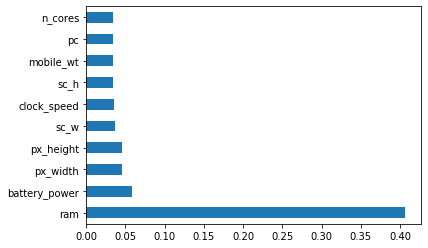

In [13]:
# plot the graph of feature  importance for better  visualization

feat_important = pd.Series(model.feature_importances_ , index=X.columns)
feat_important.nlargest(10).plot(kind = "barh")
plt.show()

# Correlation matrix with heatmap

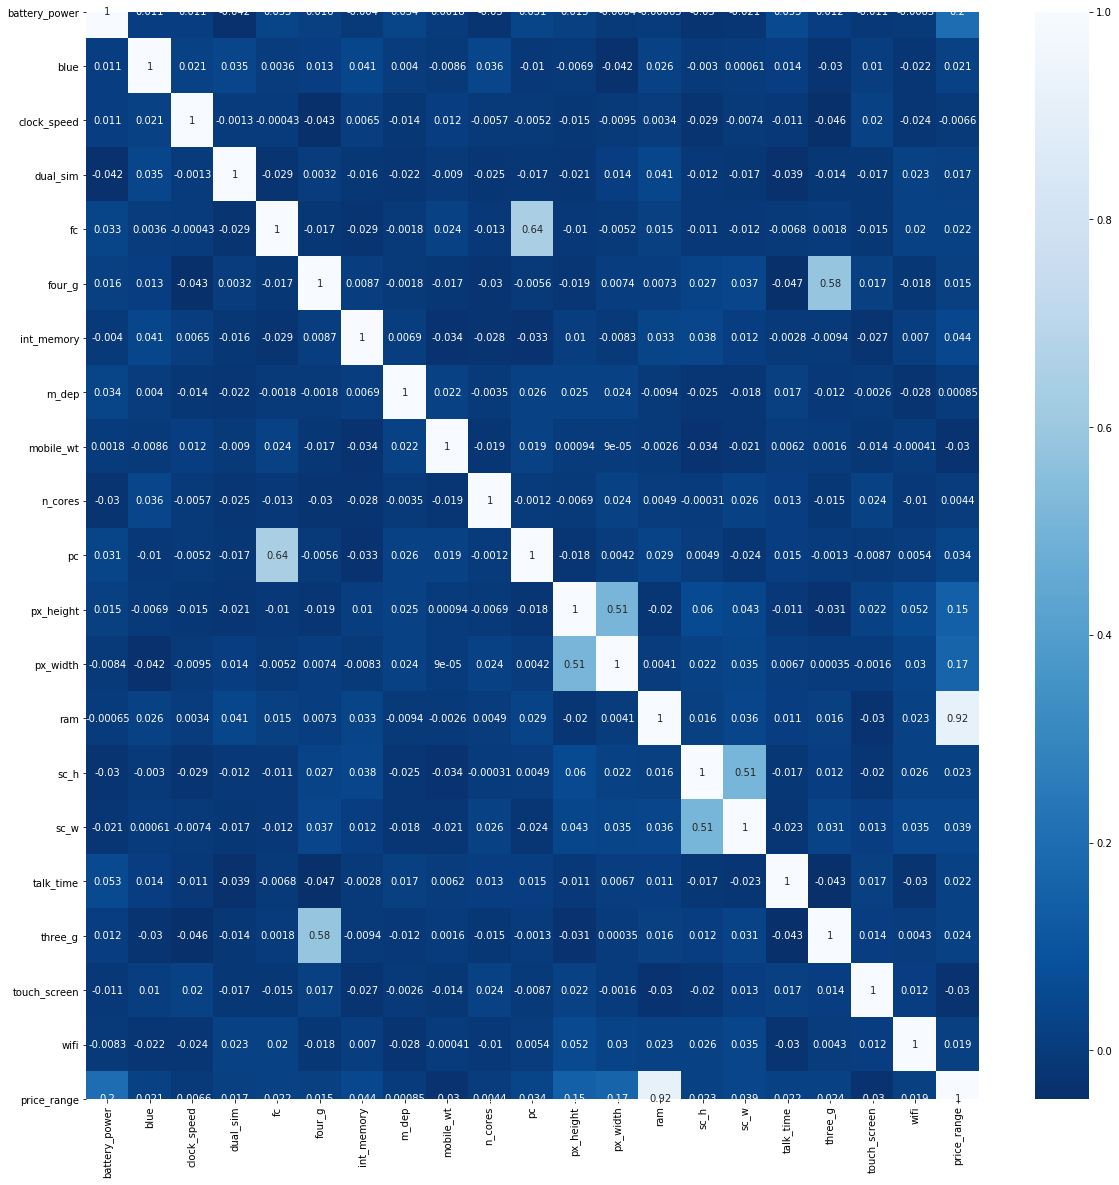

In [17]:
import seaborn as sns
# get corelations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

# plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot =True,cmap="Blues_r")